# KNN

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = sns.load_dataset('iris')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
x=df.drop('species', axis=1)
y=df['species']

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [23]:
knn.fit(x,y)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [7]:
knn.predict([[5.1, 3.5, 1.4, 0.2]])

c:\Users\MR OSMAN\miniconda3\envs\pandas\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['setosa'], dtype=object)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=80)

In [12]:
print(x_train.shape)
print(y_train.shape)

(120, 4)
(120,)


In [24]:
model = knn.fit(x_train, y_train)

In [25]:
y_pred = model.predict(x_test)

In [26]:
from sklearn.metrics import classification_report, confusion_matrix

In [27]:
print("Confusion Matrix: ",confusion_matrix(y_test, y_pred))
print("Classification Report: ",classification_report(y_test, y_pred))

Confusion Matrix:  [[13  0  0]
 [ 0 10  1]
 [ 0  0  6]]
Classification Report:                precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.91      0.95        11
   virginica       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



<Axes: >

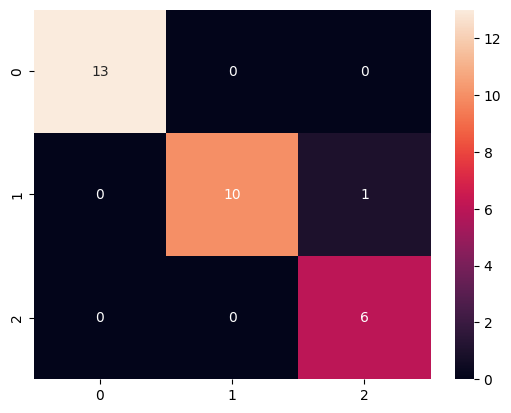

In [28]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

# For Regression

In [29]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [30]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [31]:
df.shape

(244, 7)

In [33]:
df.duplicated().sum()

np.int64(1)

In [34]:
df.drop_duplicates(inplace=True)

In [35]:
df.shape

(243, 7)

In [36]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [37]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [39]:
df['sex'] = le.fit_transform(df['sex'])
df['day'] = le.fit_transform(df['day'])
df['smoker'] = le.fit_transform(df['smoker'])
df['time'] = le.fit_transform(df['time'])

In [40]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4


In [41]:
x=df.drop('tip', axis=1)
y=df['tip']

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state = 80)

In [70]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=20, metric='minkowski', p=2)

In [71]:
model=knr.fit(x_train, y_train)

In [72]:
y_pred = model.predict(x_test)

In [73]:
from sklearn.metrics import mean_squared_error, r2_score

In [74]:
print("MSE = ",mean_squared_error(y_test, y_pred))
print("R2 Score = ",r2_score(y_test, y_pred))

MSE =  1.0504400306122446
R2 Score =  0.45539885242571365
